In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
y_0=10 #mg
h=4
lamb=np.log(2)/8

Para $h=4$ entonces:

$4=\frac{40}{n}$,  entonces $n=10$

In [22]:
def Euler(f,x_0,x_n,y_0,n):
    
    h=(x_n-x_0)/n
    
    t=np.arange(x_0,x_n+h,h)
    
    y = np.zeros (len(t))

    y[0] = y_0
    t[0] = x_0

    for i in range(0, len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
    return (t,y)

def eulerMejorado(f,x_0,x_n,y_0,n):
    h=(x_n-x_0)/n
    
    t=np.arange(x_0,x_n+h,h)
    
    y = np.zeros (len(t))
    y_mej=np.zeros(len(t))

    y[0] = y_0
    y_mej[0]=y_0
    t[0] = x_0
    

    for i in range(0, len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
        y_mej[i+1]=y_mej[i]+(h/2)*(f(t[i],y[i])+f(t[i+1],y[i+1]))
    return (t,y_mej)

def rk4(f,x0,xn,y0,n):
    x=np.linspace(x0,xn,n+1)
    y=np.zeros(n+1)
    h=(xn-x0)/n
    y[0]=y0
    
    for i in range(0,n):
        k1=f(x[i],y[i])
        k2=f(x[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(x[i]+0.5*h,y[i]+0.5*h*k2)
        k4=f(x[i]+h,y[i]+h*k3)
        
        y[i+1]=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
    return (x,y)

exactSol=lambda t: y_0*np.exp(-lamb*t)
t=np.arange(0,40,0.1)
f=lambda t,y: -lamb*y
    

In [16]:
Sol_1=Euler(f,0,40,10,10)
Sol_2=eulerMejorado(f,0,40,10,10)
Sol_3=rk4(f,0,40,10,10)

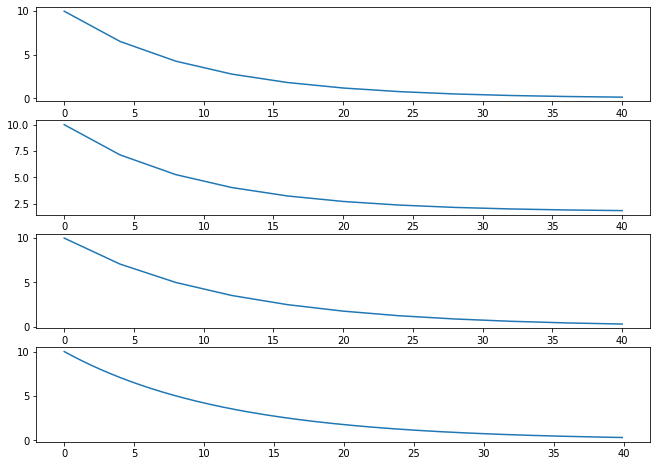

In [23]:
fig,ax=plt.subplots(4,figsize=(11,8))
ax[0].plot(Sol_1[0],Sol_1[1])
ax[1].plot(Sol_2[0],Sol_2[1])
ax[2].plot(Sol_3[0],Sol_3[1])
ax[3].plot(t,exactSol(t))